In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [3]:
# Load Excel
df = pd.read_excel("Modified_Quality_Inspection_Dataset.xlsx")

In [5]:
# Save to SQLite as 'sales' table
conn = sqlite3.connect("sales_data.db")
df.to_sql("sales", conn, if_exists="replace", index=False)
conn.close()


In [7]:
# Add Price, Profit & Total Revenue using SQL

# Since these columns don’t exist in your Excel, we can calculate them inside SQL.

# We’ll:

# Assign a price per product (via CASE WHEN in SQL).

# Calculate total revenue = quantity * price.

# Calculate profit = total_revenue × margin.

import pandas as pd
import sqlite3

conn = sqlite3.connect("sales_data.db")

query = """
SELECT Product_Name AS product,
       SUM(Units_Checked) AS total_qty,
       CASE 
           WHEN Product_Name = 'Module-Y' THEN 150
           WHEN Product_Name = 'Modul-X' THEN 200
           WHEN Product_Name = 'PCB-200' THEN 300
           ELSE 180
       END AS price,
       SUM(Units_Checked) * 
       CASE 
           WHEN Product_Name = 'Module-Y' THEN 150
           WHEN Product_Name = 'Modul-X' THEN 200
           WHEN Product_Name = 'PCB-200' THEN 300
           ELSE 180
       END AS total_revenue,
       (SUM(Units_Checked) * 
       CASE 
           WHEN Product_Name = 'Module-Y' THEN 150
           WHEN Product_Name = 'Modul-X' THEN 200
           WHEN Product_Name = 'PCB-200' THEN 300
           ELSE 180
       END) * 0.3 AS profit
FROM sales
GROUP BY Product_Name
"""

df_summary = pd.read_sql_query(query, conn)
conn.close()

print(df_summary)



    product  total_qty  price  total_revenue     profit
0      None        NaN    180            NaN        NaN
1   Modul-X    11860.0    200      2372000.0   711600.0
2  Module-Y     9886.0    150      1482900.0   444870.0
3   PCB-100     9164.0    180      1649520.0   494856.0
4   PCB-200    11430.0    300      3429000.0  1028700.0


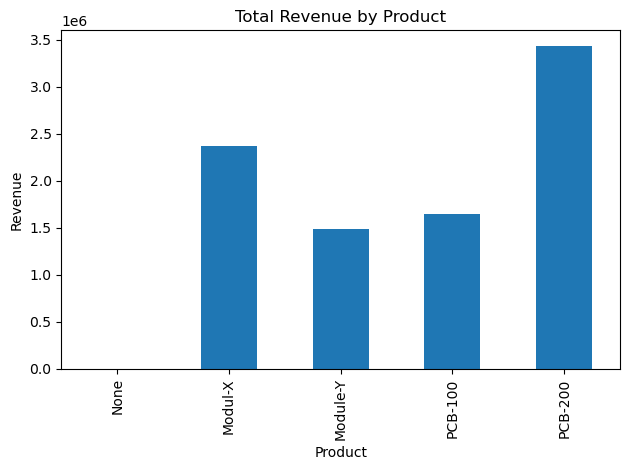

In [9]:
#Plot the Bar Chart
import matplotlib.pyplot as plt

df_summary.plot(kind='bar', x='product', y='total_revenue', legend=False)
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()